<h1> <div align="center">Tp de  données manquantes: </div></h1>

In [280]:
#Chargement du dataset
import pandas as pd
df=pd.read_csv("/content/sample_data/wiki4HE.csv", sep=";")

In [281]:
#Visualisation des 5 premieres lignes:
df.head()

,AGE,GENDER,DOMAIN,PhD,YEARSEXP,UNIVERSITY,UOC_POSITION,OTHER_POSITION,OTHERSTATUS,USERWIKI,...,BI2,Inc1,Inc2,Inc3,Inc4,Exp1,Exp2,Exp3,Exp4,Exp5
0,40,0,2,1,14,1,2,?,?,0,...,3,5,5,5,5,4,4,4,1,2
1,42,0,5,1,18,1,2,?,?,0,...,2,4,4,3,4,2,2,4,2,4
2,37,0,4,1,13,1,3,?,?,0,...,1,5,3,5,5,2,2,2,1,3
3,40,0,4,0,13,1,3,?,?,0,...,3,3,4,4,3,4,4,3,3,4
4,51,0,6,0,8,1,3,?,?,1,...,5,5,5,4,4,5,5,5,4,4


In [282]:
#affichage des noms de colonnes:
df.columns

Index(['AGE', 'GENDER', 'DOMAIN', 'PhD', 'YEARSEXP', 'UNIVERSITY',
       'UOC_POSITION', 'OTHER_POSITION', 'OTHERSTATUS', 'USERWIKI', 'PU1',
       'PU2', 'PU3', 'PEU1', 'PEU2', 'PEU3', 'ENJ1', 'ENJ2', 'Qu1', 'Qu2',
       'Qu3', 'Qu4', 'Qu5', 'Vis1', 'Vis2', 'Vis3', 'Im1', 'Im2', 'Im3', 'SA1',
       'SA2', 'SA3', 'Use1', 'Use2', 'Use3', 'Use4', 'Use5', 'Pf1', 'Pf2',
       'Pf3', 'JR1', 'JR2', 'BI1', 'BI2', 'Inc1', 'Inc2', 'Inc3', 'Inc4',
       'Exp1', 'Exp2', 'Exp3', 'Exp4', 'Exp5'],
      dtype='object')

In [283]:
# imputation des points d'interrogation par des NaN
import numpy as np
df.replace('?', np.nan, inplace=True)

In [284]:
# Informations sur le dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 53 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   AGE             913 non-null    int64 
 1   GENDER          913 non-null    int64 
 2   DOMAIN          911 non-null    object
 3   PhD             913 non-null    int64 
 4   YEARSEXP        890 non-null    object
 5   UNIVERSITY      913 non-null    int64 
 6   UOC_POSITION    800 non-null    object
 7   OTHER_POSITION  652 non-null    object
 8   OTHERSTATUS     373 non-null    object
 9   USERWIKI        909 non-null    object
 10  PU1             906 non-null    object
 11  PU2             902 non-null    object
 12  PU3             908 non-null    object
 13  PEU1            909 non-null    object
 14  PEU2            899 non-null    object
 15  PEU3            816 non-null    object
 16  ENJ1            906 non-null    object
 17  ENJ2            896 non-null    object
 18  Qu1       

In [285]:
#affichage de la somme des données manquantes dans chaque colonne apres une imputation de "?" par NaN
df.isnull().sum()

AGE                 0
GENDER              0
DOMAIN              2
PhD                 0
YEARSEXP           23
UNIVERSITY          0
UOC_POSITION      113
OTHER_POSITION    261
OTHERSTATUS       540
USERWIKI            4
PU1                 7
PU2                11
PU3                 5
PEU1                4
PEU2               14
PEU3               97
ENJ1                7
ENJ2               17
Qu1                 7
Qu2                10
Qu3                15
Qu4                22
Qu5                29
Vis1               72
Vis2              117
Vis3                8
Im1                22
Im2                20
Im3                57
SA1                11
SA2                12
SA3                11
Use1               14
Use2               17
Use3                9
Use4               23
Use5               15
Pf1                11
Pf2                 6
Pf3                14
JR1                27
JR2                53
BI1                32
BI2                43
Inc1               35
Inc2      

In [286]:
#Suppression de la colonne other position vu que plus que 50% des données de cette colonne sont manquantes
df = df.drop("OTHER_POSITION", axis=1)

In [287]:
# Conversion des colonnes "university", "gender" ett "phD" en object car ce sont des variables catégorielles:
df['UNIVERSITY'] = df['UNIVERSITY'].astype(object)
df['GENDER'] = df['GENDER'].astype(object)
df['PhD'] = df['PhD'].astype(object)


In [288]:
# YEARSEXP est une variable numérique et non pas " object" il faut la convertir en type numérique
df['YEARSEXP'] = df['YEARSEXP'].astype(float)

In [289]:
#imputation par la médiane:
median = df['YEARSEXP'].median()
df['YEARSEXP'].fillna(median, inplace=True)


In [290]:
for i in df.columns : 
    print(df[i].value_counts())

43    49
46    44
42    44
39    44
45    43
33    43
38    42
41    41
35    38
44    38
40    38
48    35
36    35
47    32
49    32
37    31
34    30
50    28
31    23
52    22
32    21
51    18
53    16
29    13
56    11
54    11
28    11
55    10
30     9
58     8
59     7
62     7
60     6
57     5
26     5
63     4
27     4
24     3
65     2
25     2
23     2
61     2
67     1
64     1
69     1
68     1
Name: AGE, dtype: int64
0    525
1    388
Name: GENDER, dtype: int64
6    361
1    183
4    137
5    101
3     73
2     56
Name: DOMAIN, dtype: int64
0    489
1    424
Name: PhD, dtype: int64
10.0    100
3.0      65
15.0     62
5.0      61
4.0      59
20.0     56
12.0     53
7.0      47
1.0      43
6.0      42
8.0      42
2.0      39
18.0     25
14.0     24
25.0     22
9.0      21
11.0     21
16.0     19
13.0     19
17.0     17
22.0     13
23.0     11
19.0     10
30.0      8
21.0      7
24.0      5
37.0      3
0.0       3
27.0      3
26.0      3
35.0      3
28.0      2
36.0      

In [291]:
#desciption
df.describe()

,AGE,YEARSEXP
count,913.000000,913.000000
mean,42.246440,10.852136
std,8.058418,7.357941
min,23.000000,0.000000
25%,36.000000,5.000000
50%,42.000000,10.000000
75%,47.000000,15.000000
max,69.000000,43.000000


<ipython-input-292-3b86c4a243da>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[:, i], bins=25)


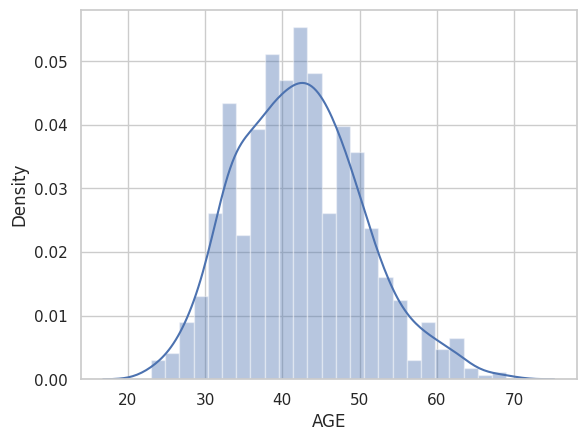

<ipython-input-292-3b86c4a243da>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[:, i], bins=25)


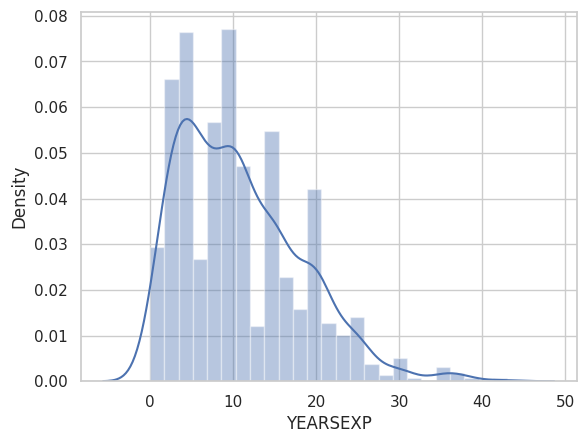

In [292]:
#affichage de la distribution des données numériques
import seaborn as sns
import matplotlib.pyplot as plt
for i in df:
    if not (df[i].dtypes== 'object'):
        sns.distplot(df.loc[:, i], bins=25)
        plt.show()

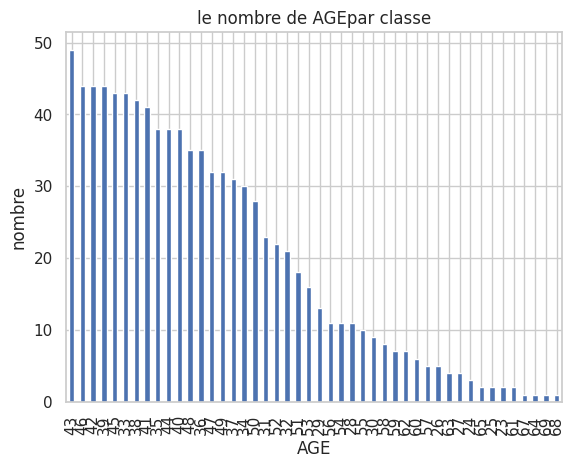

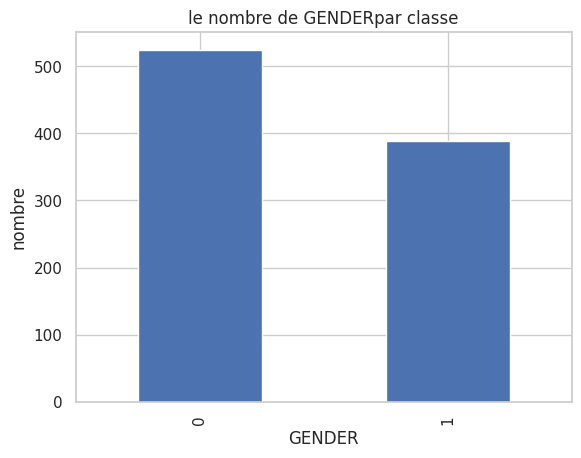

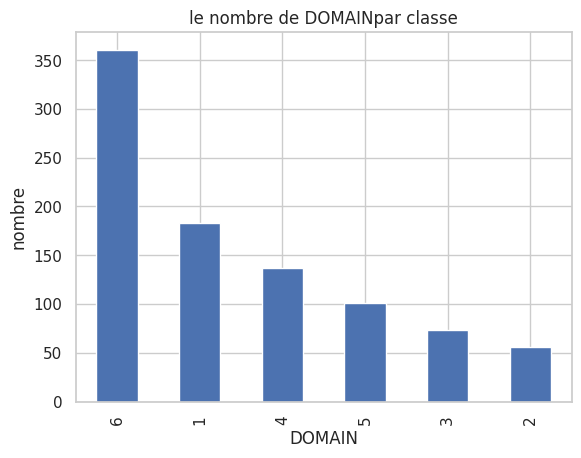

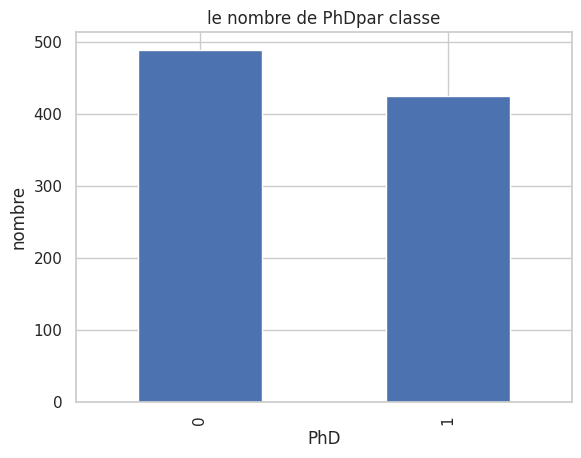

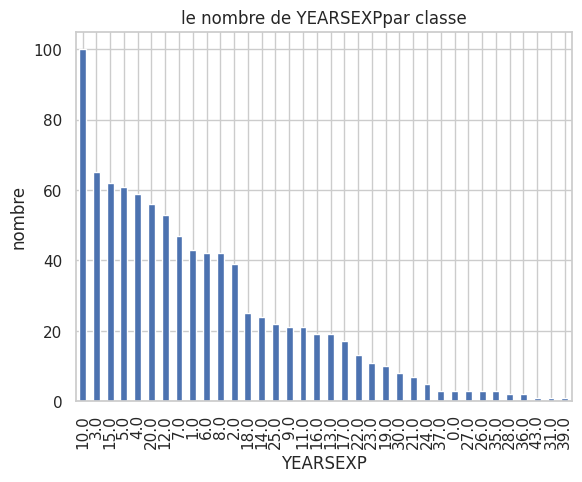

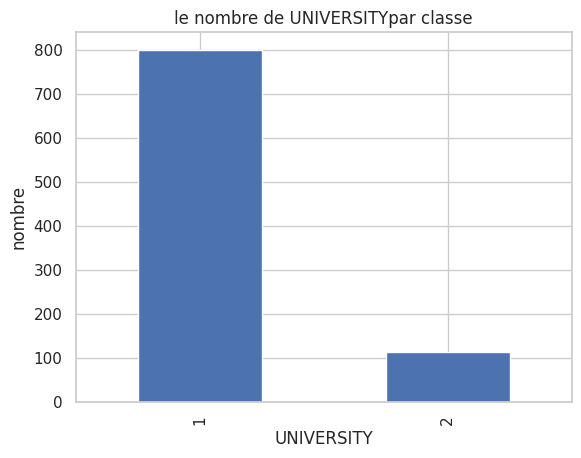

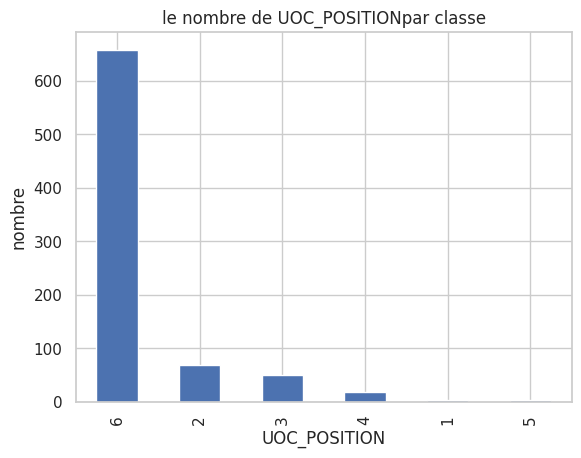

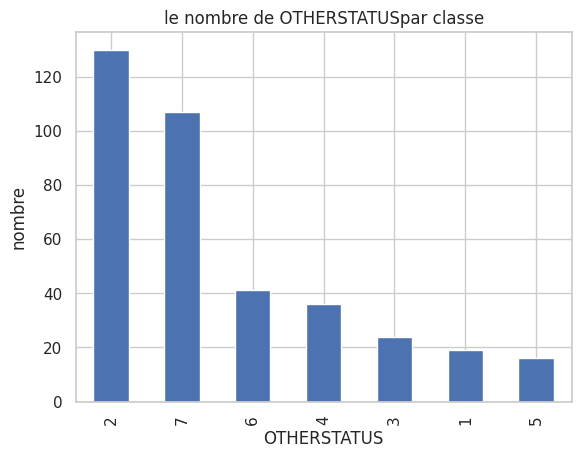

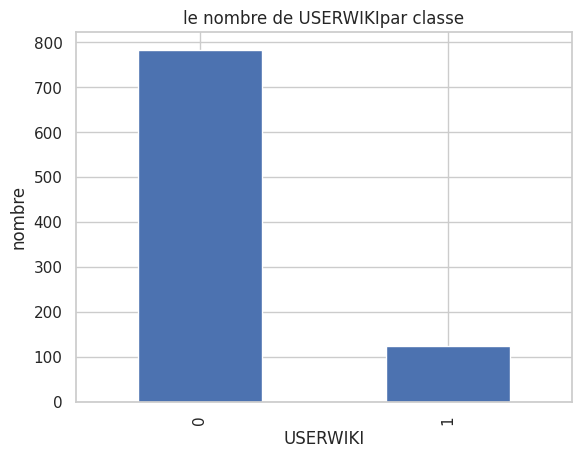

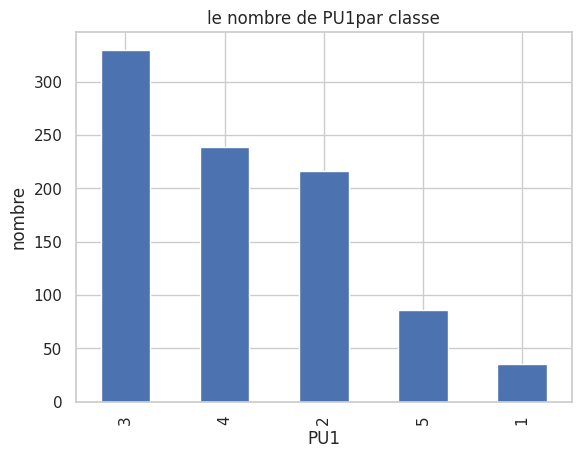

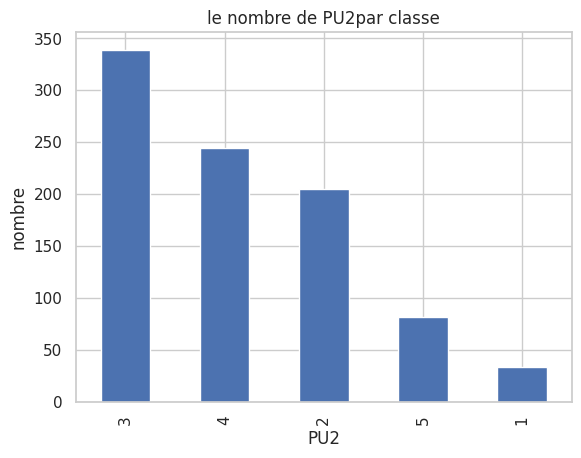

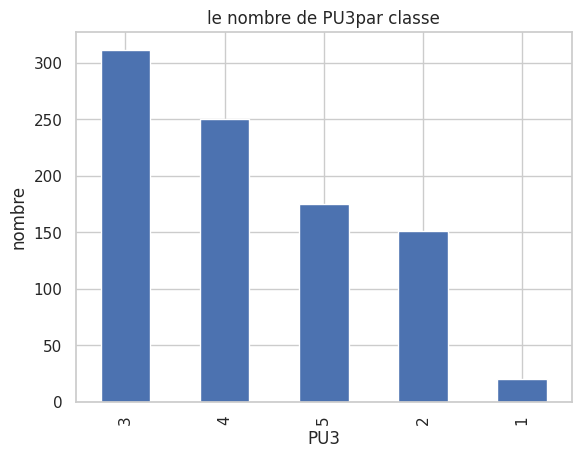

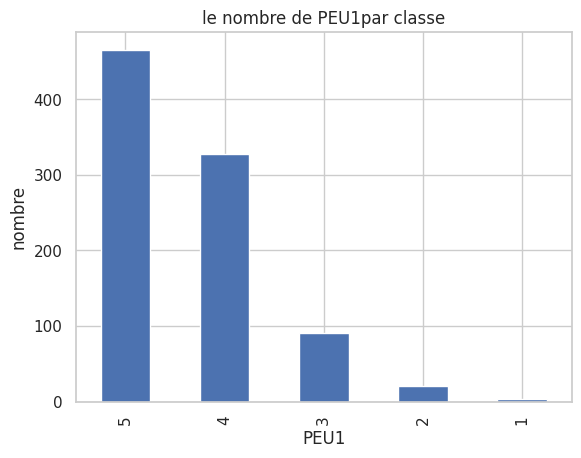

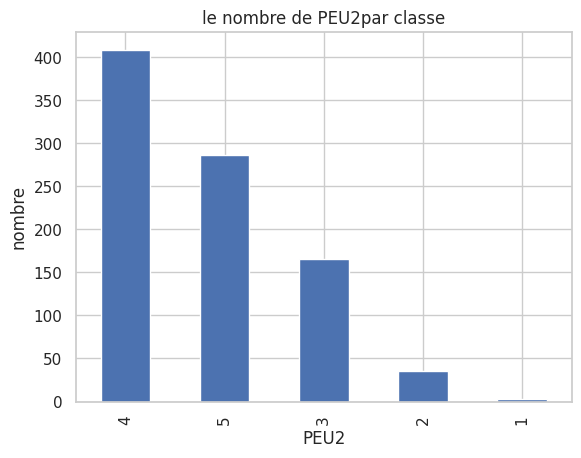

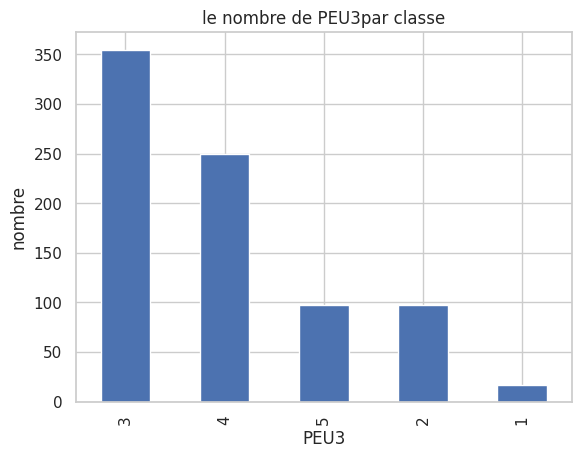

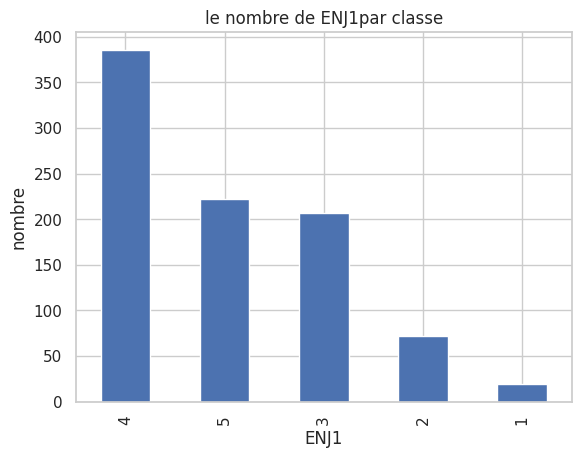

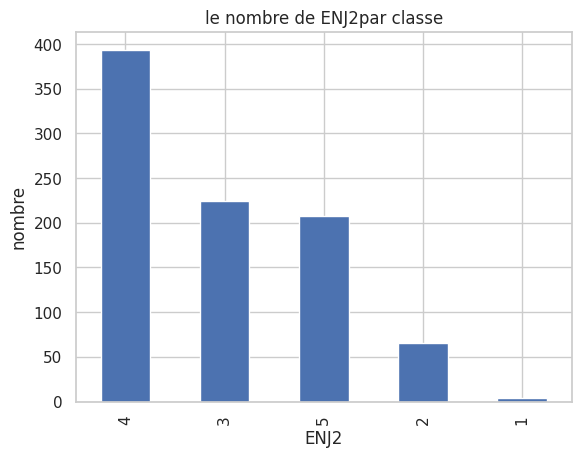

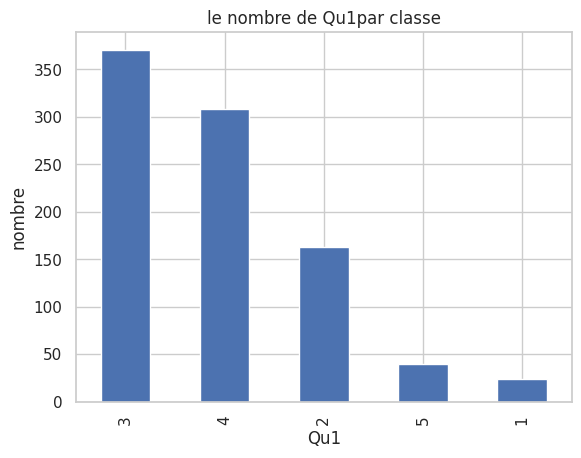

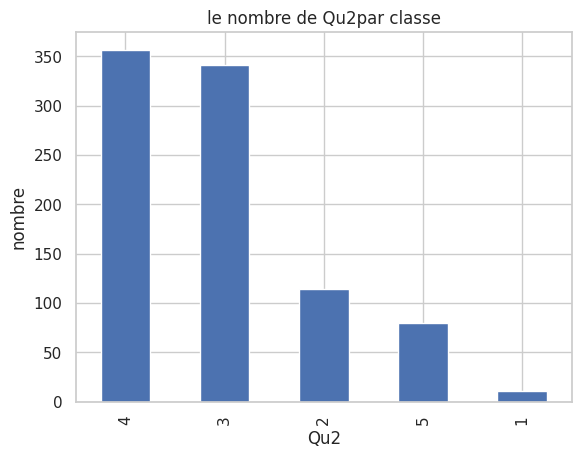

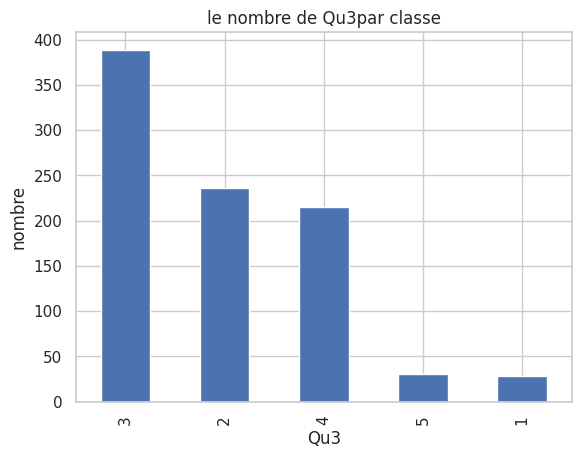

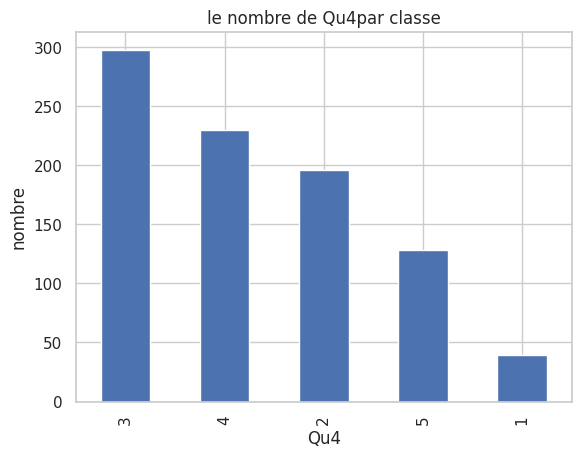

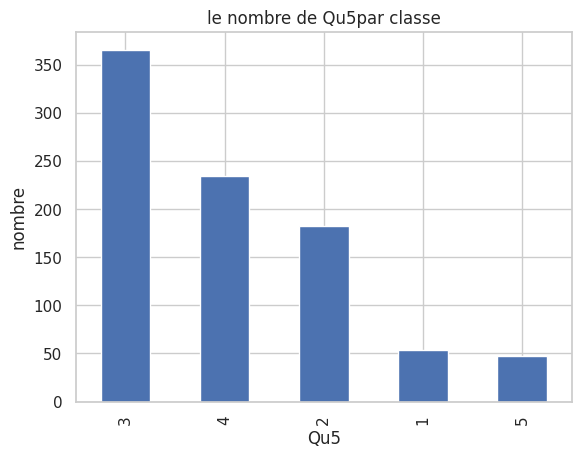

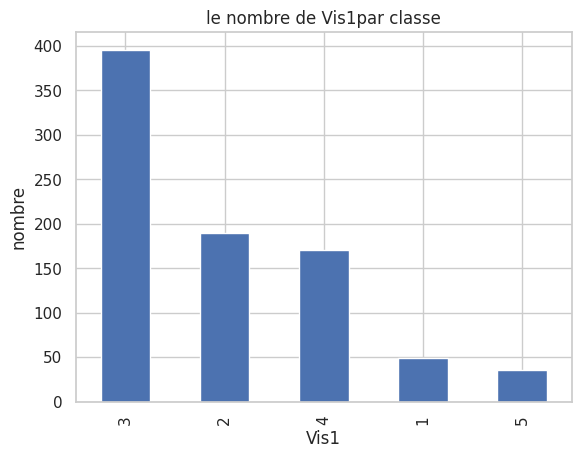

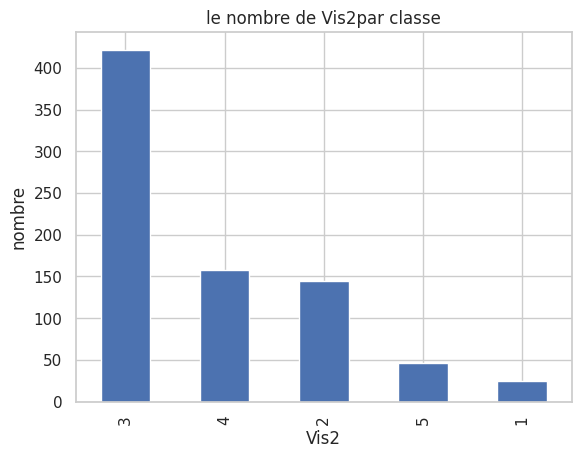

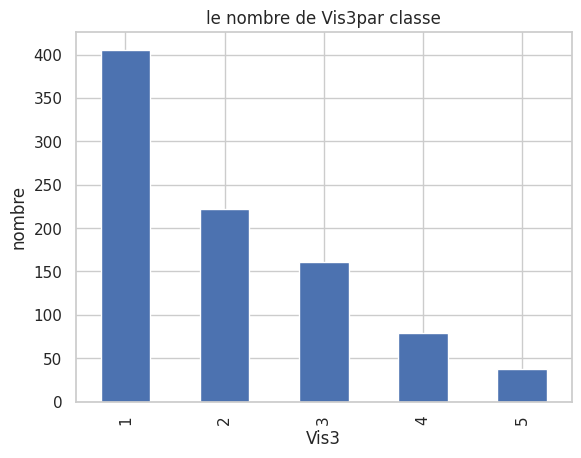

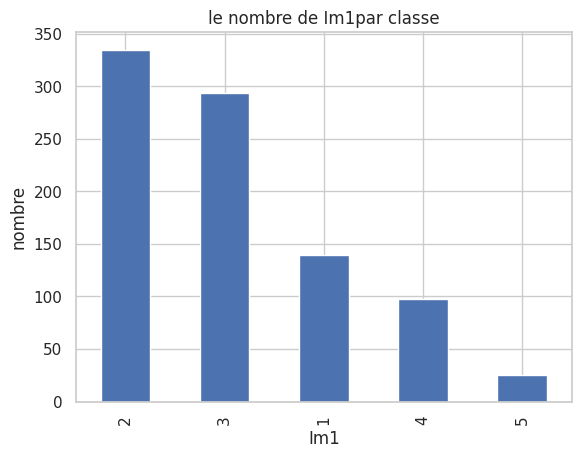

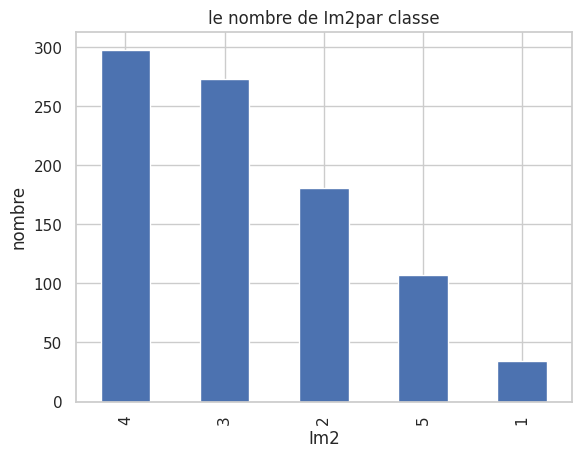

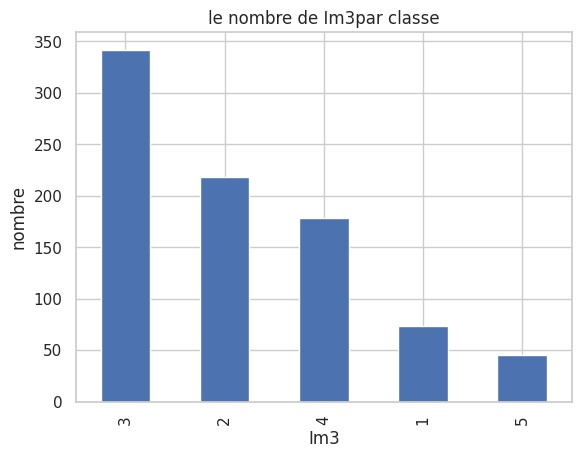

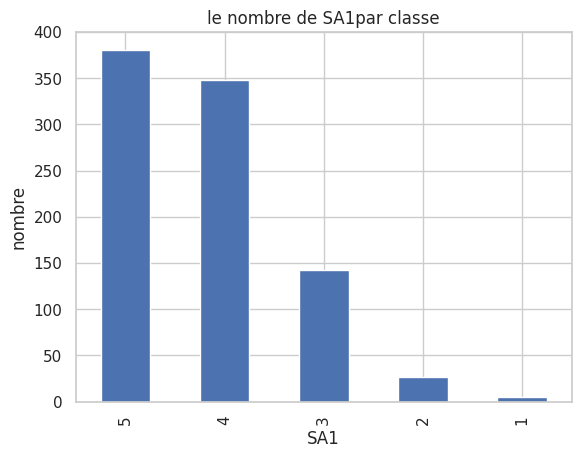

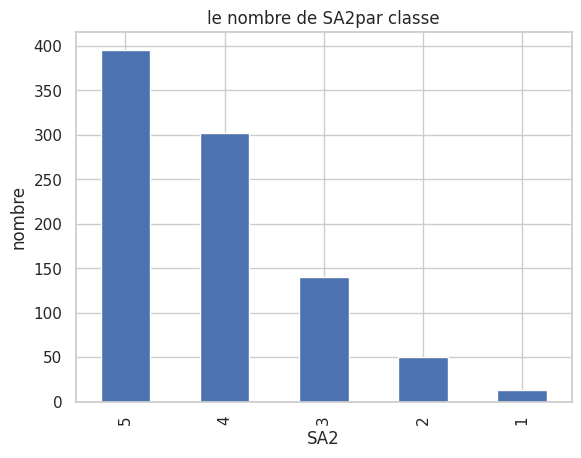

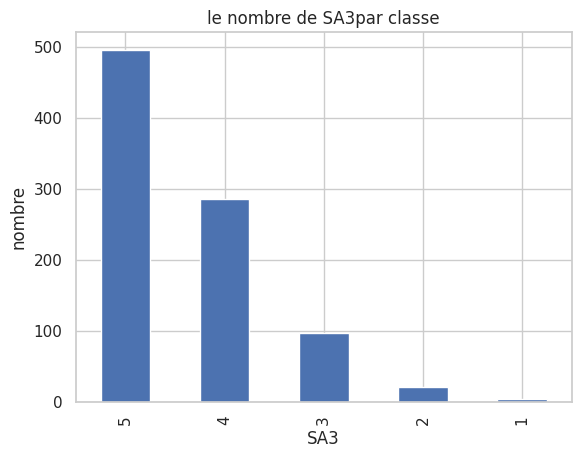

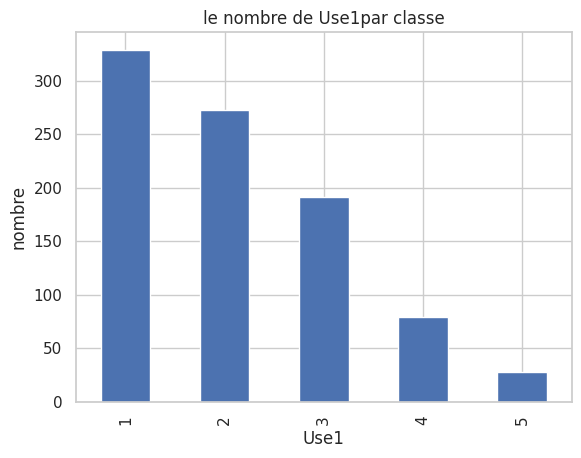

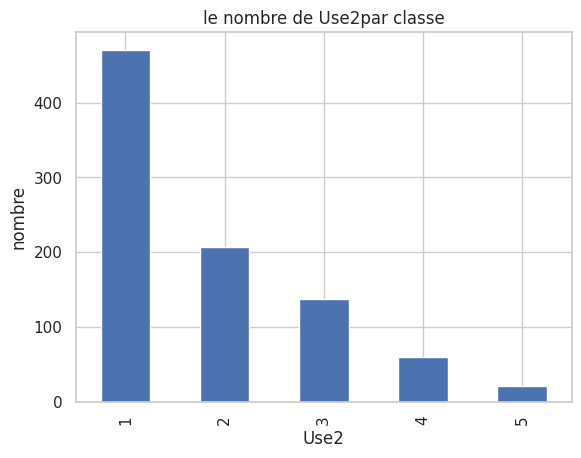

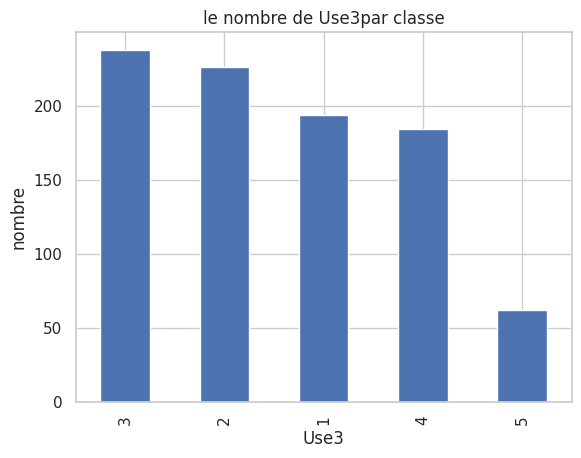

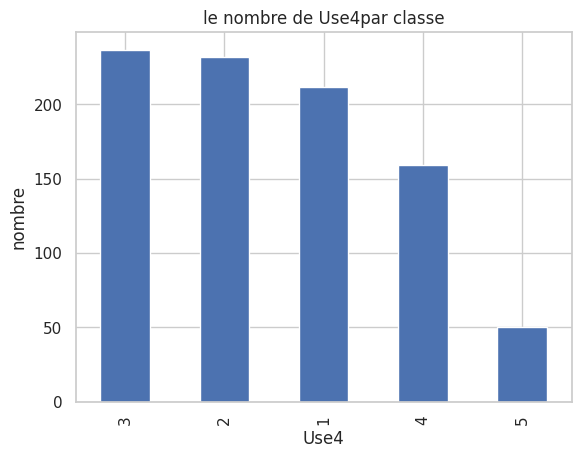

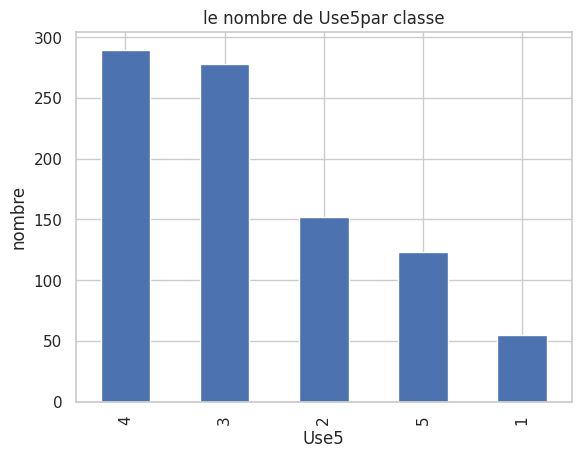

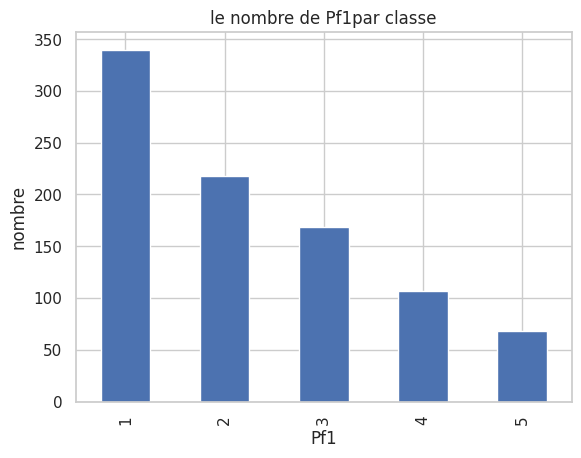

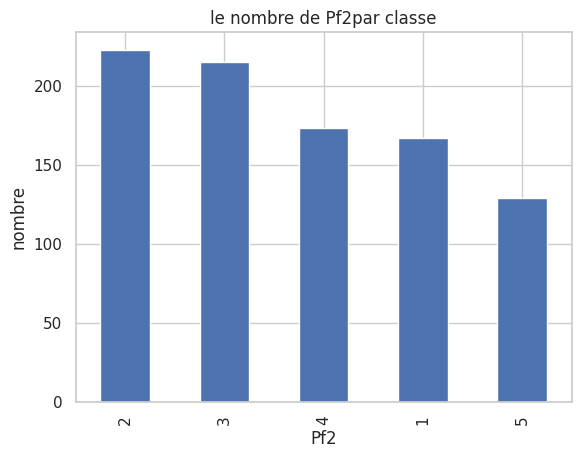

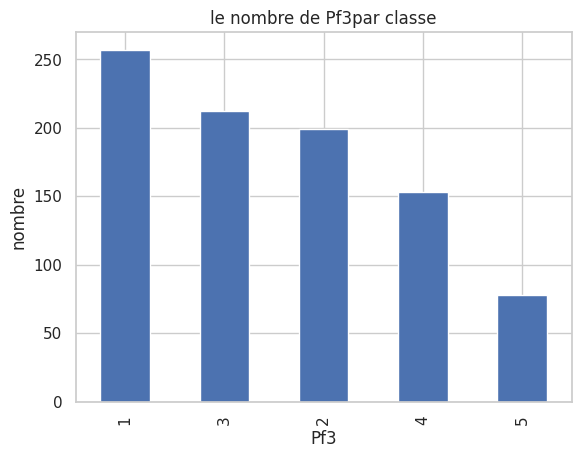

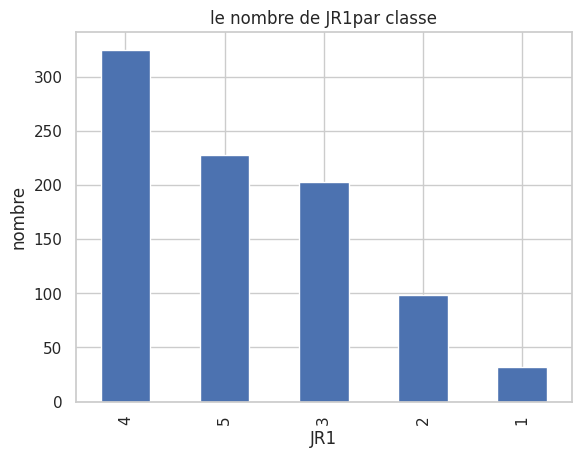

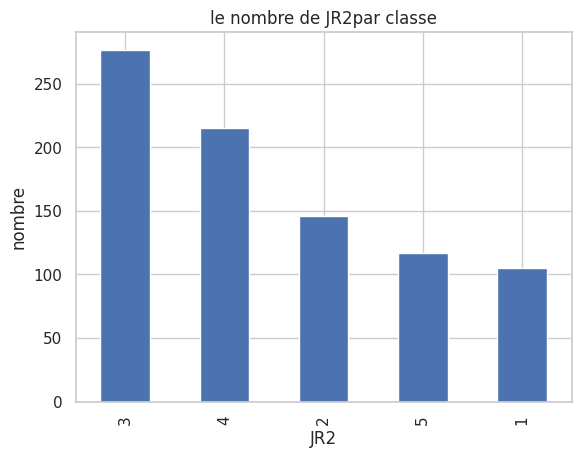

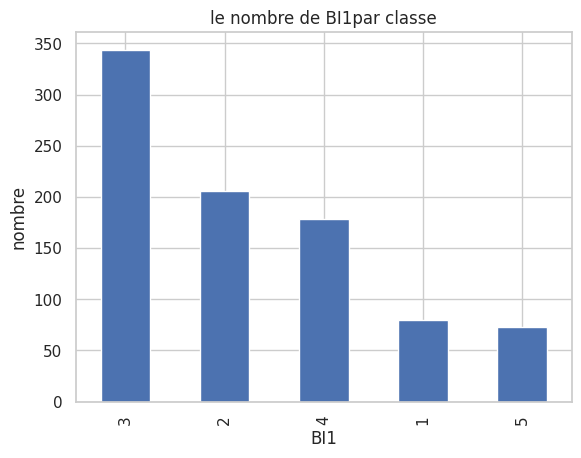

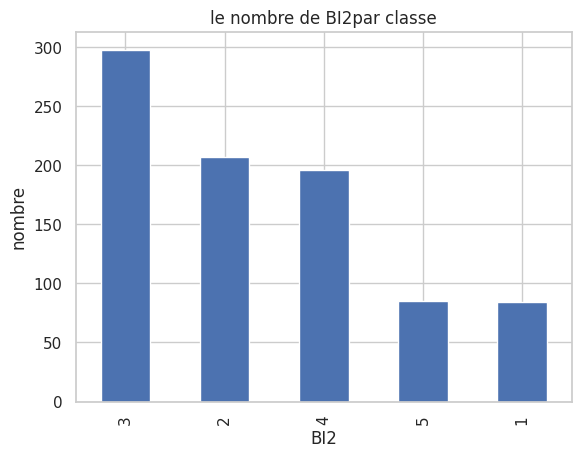

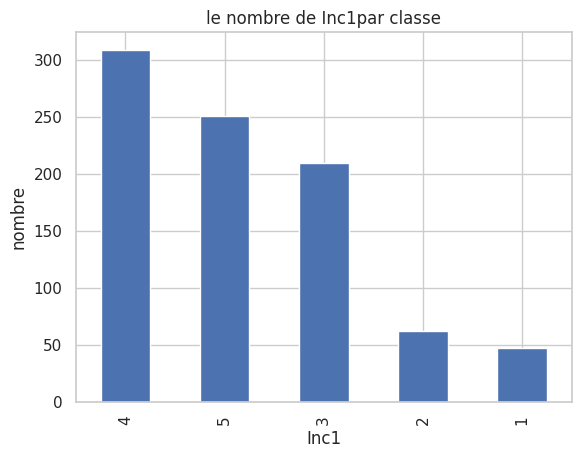

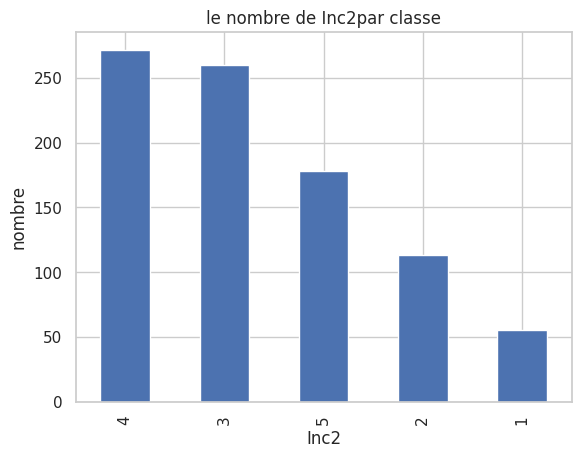

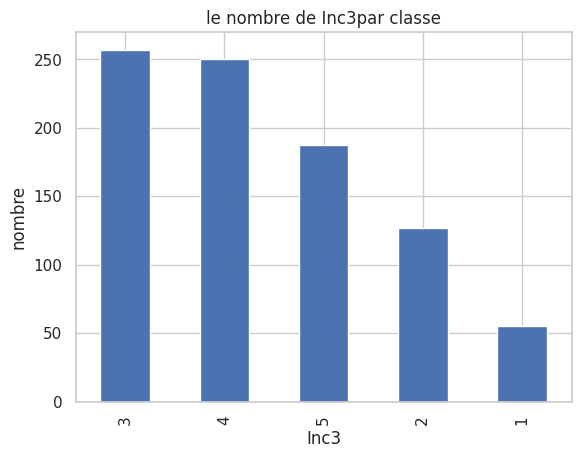

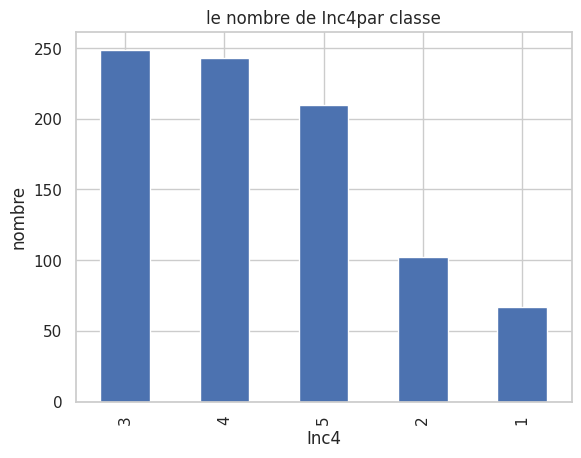

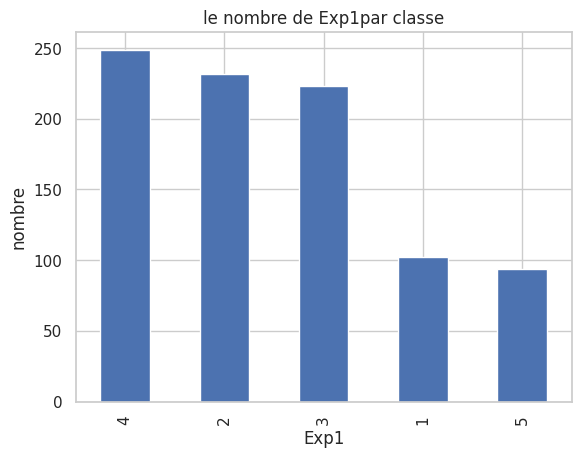

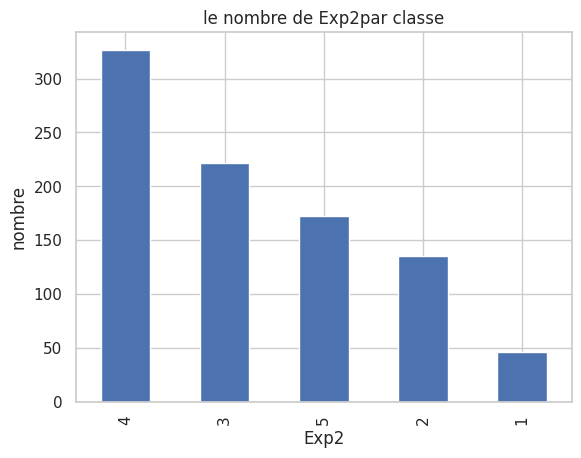

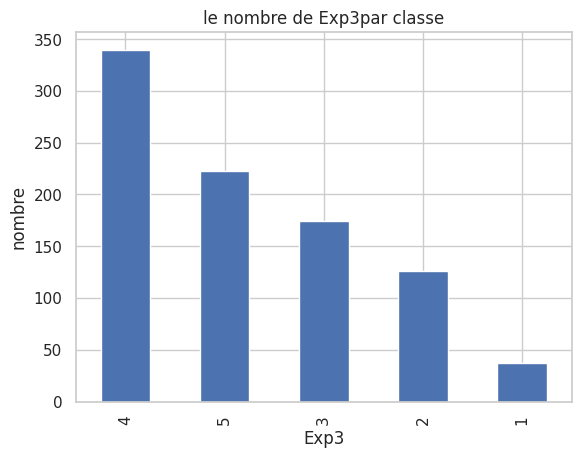

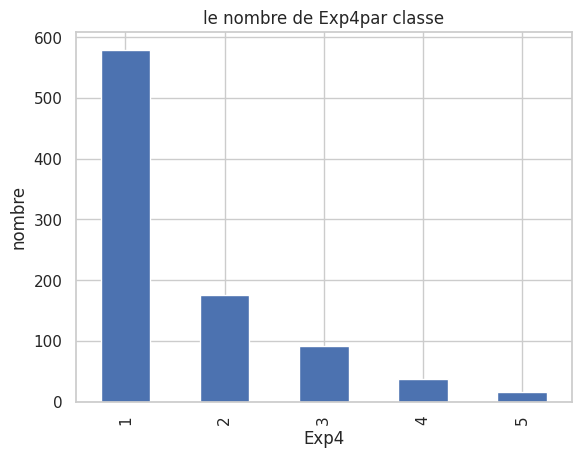

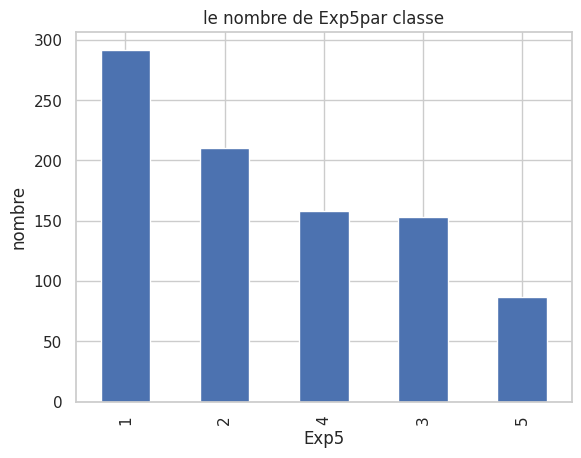

In [293]:
import matplotlib.pyplot as plt
for i in df.columns : 
    df[i].value_counts().plot(kind = 'bar')
    plt.xlabel(i)
    plt.ylabel("nombre")
    plt.title("le nombre de "+i+"par classe")
    plt.show()

In [294]:
categorical=['GENDER', 'DOMAIN', 'PhD', 'UNIVERSITY',
       'UOC_POSITION', 'OTHERSTATUS', 'USERWIKI', 'PU1',
       'PU2', 'PU3', 'PEU1', 'PEU2', 'PEU3', 'ENJ1', 'ENJ2', 'Qu1', 'Qu2',
       'Qu3', 'Qu4', 'Qu5', 'Vis1', 'Vis2', 'Vis3', 'Im1', 'Im2', 'Im3', 'SA1',
       'SA2', 'SA3', 'Use1', 'Use2', 'Use3', 'Use4', 'Use5', 'Pf1', 'Pf2',
       'Pf3', 'JR1', 'JR2', 'BI1', 'BI2', 'Inc1', 'Inc2', 'Inc3', 'Inc4',
       'Exp1', 'Exp2', 'Exp3', 'Exp4', 'Exp5']


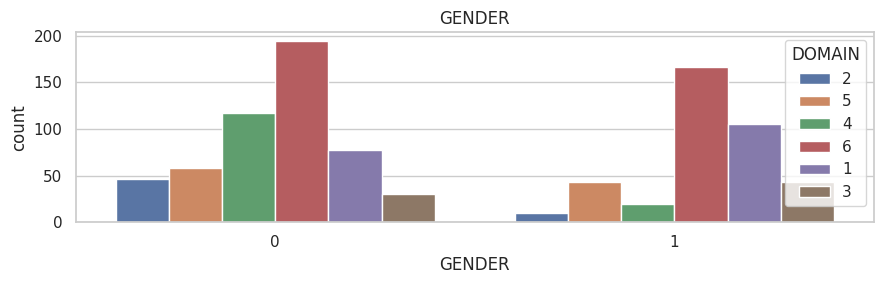

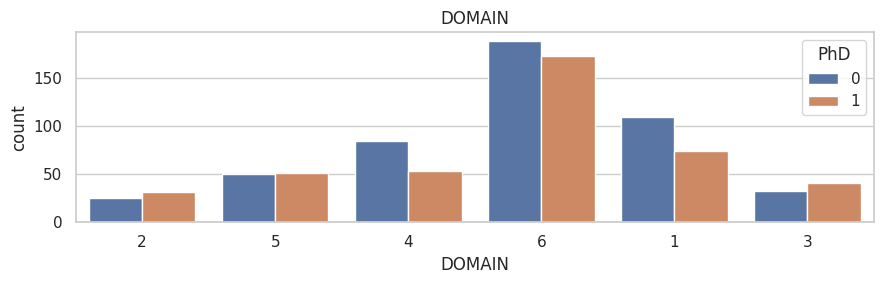

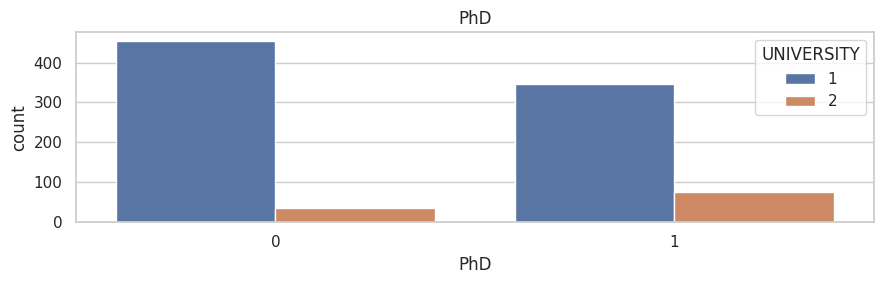

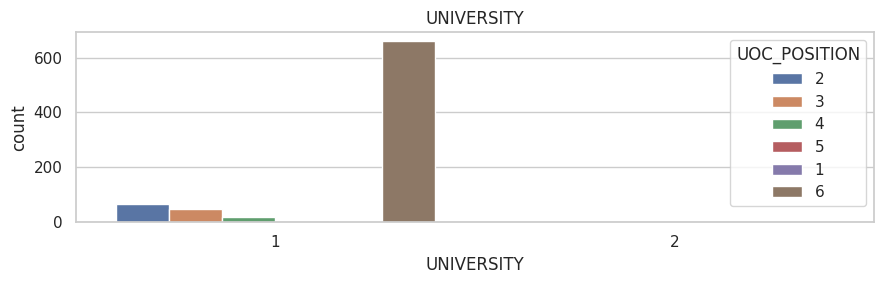

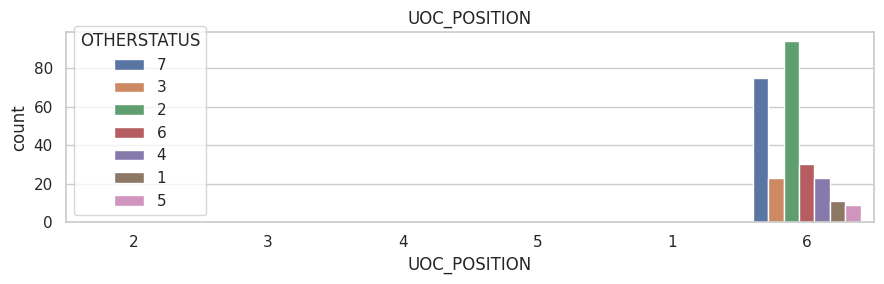

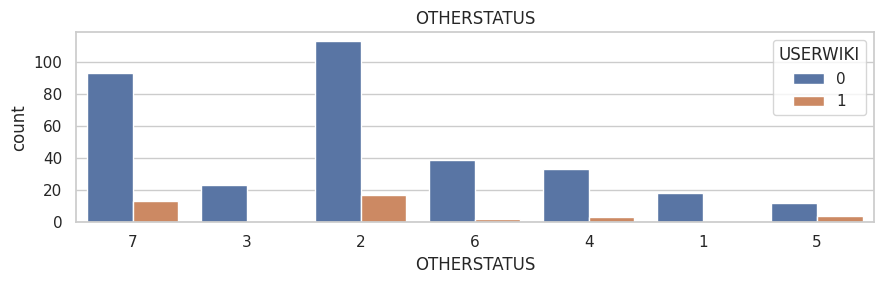

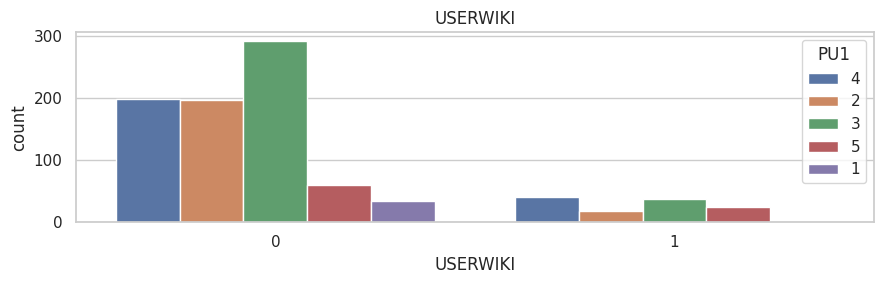

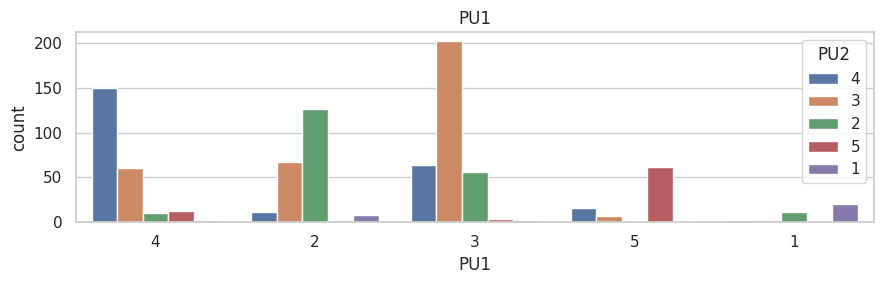

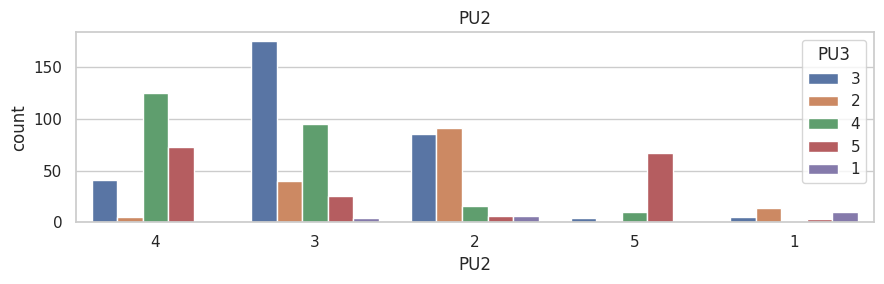

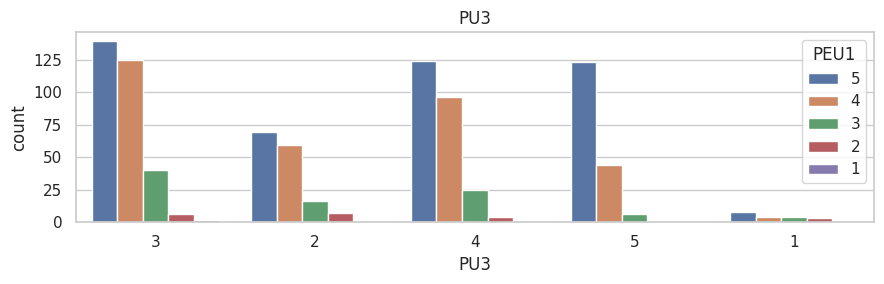

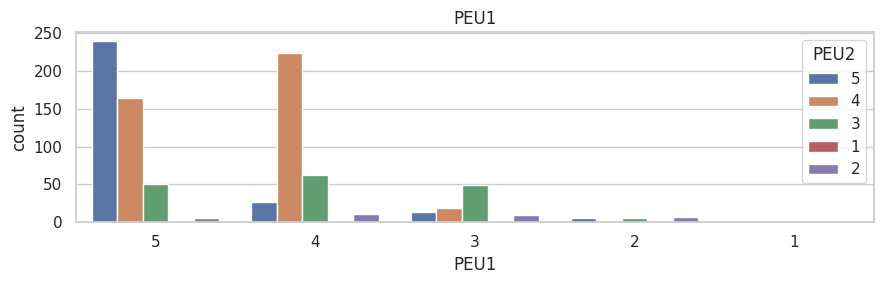

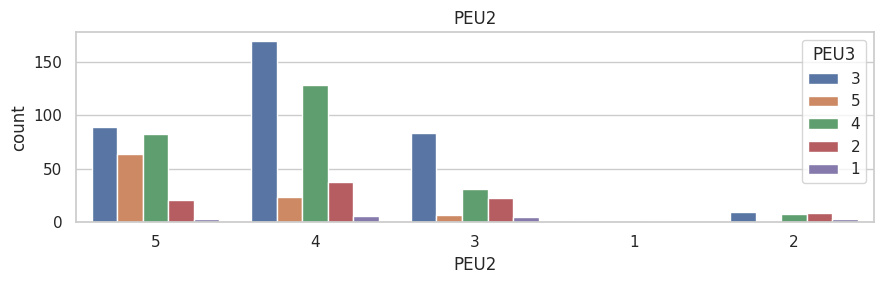

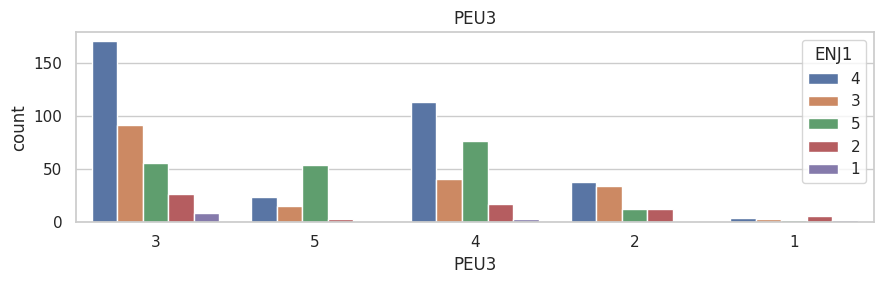

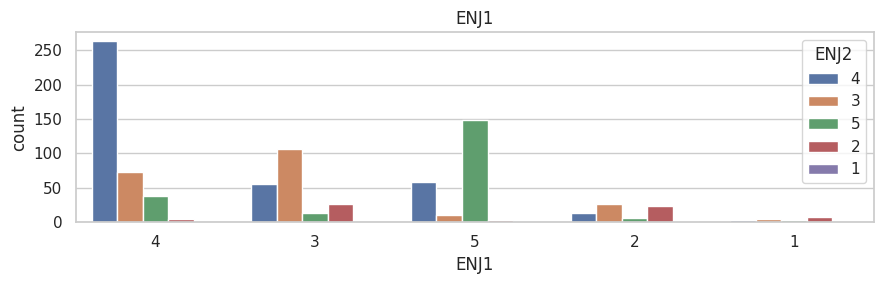

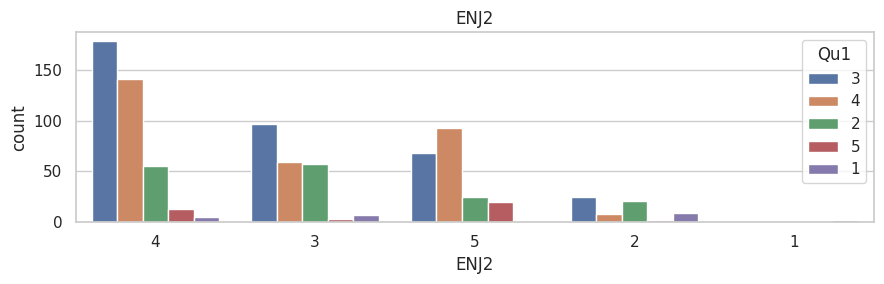

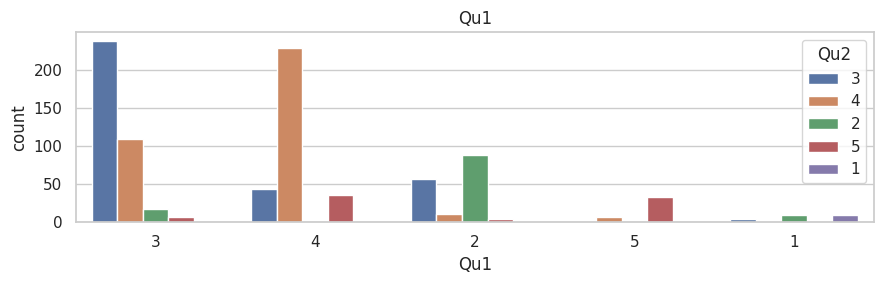

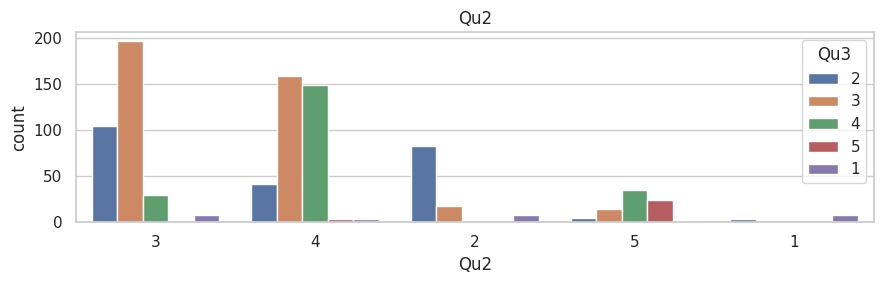

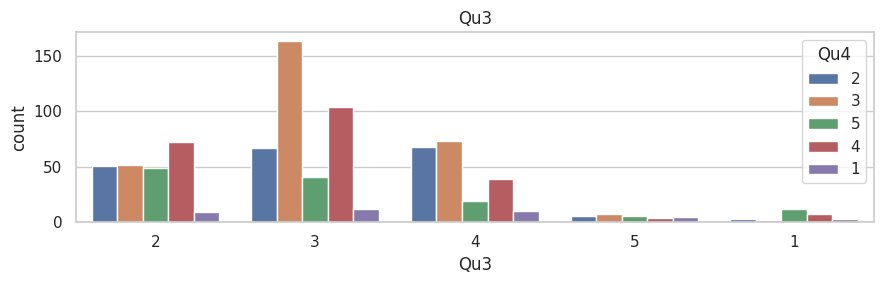

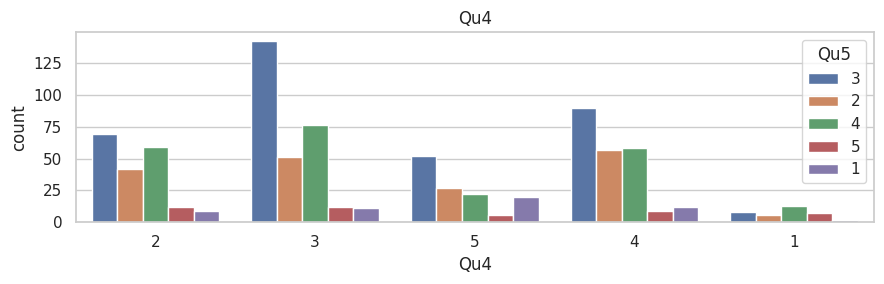

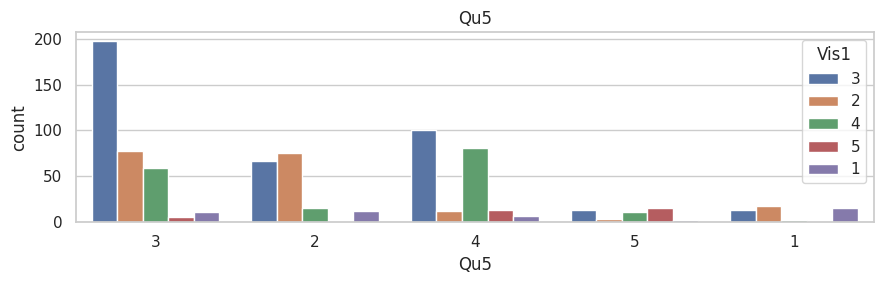

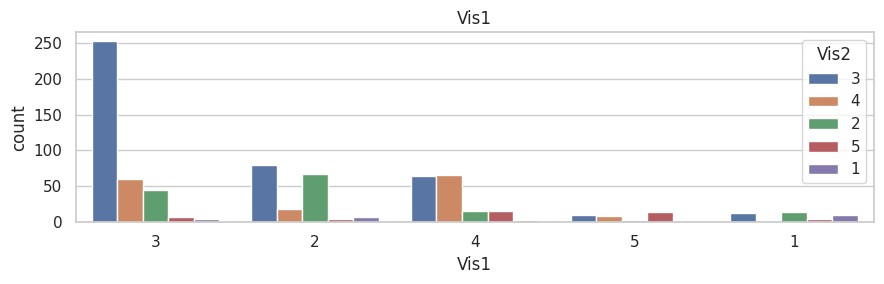

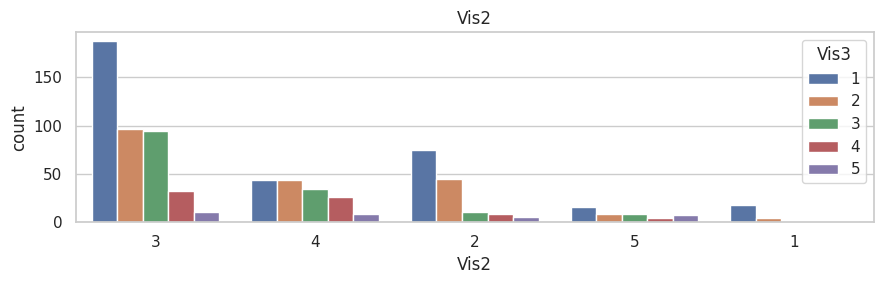

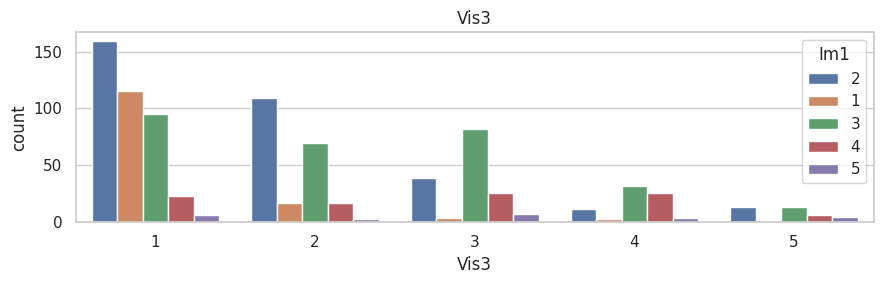

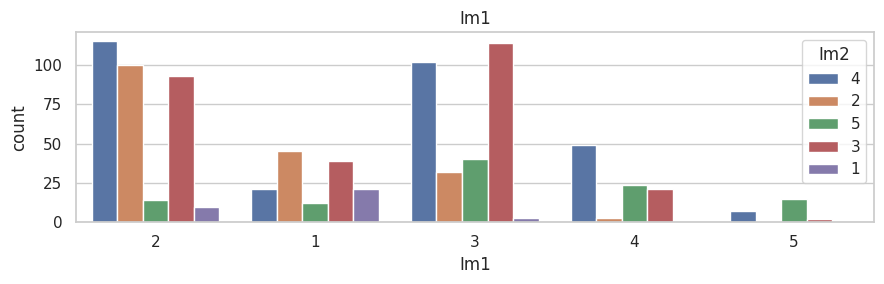

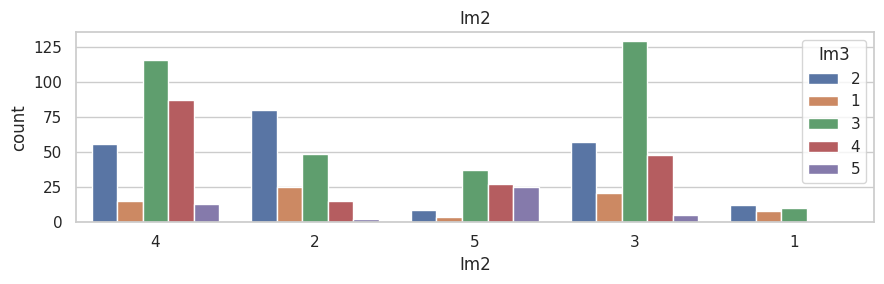

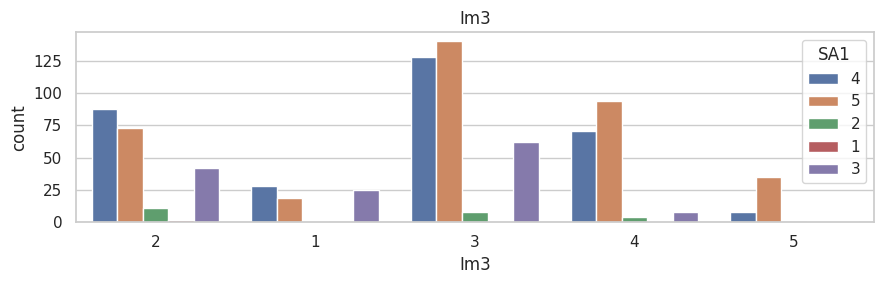

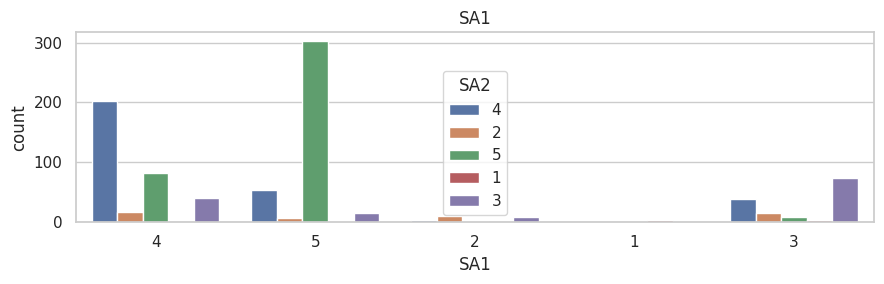

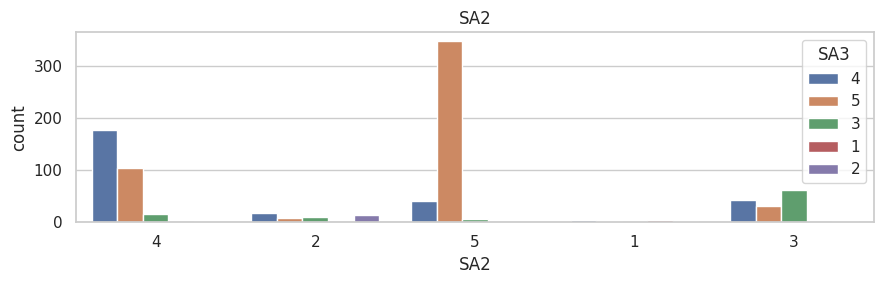

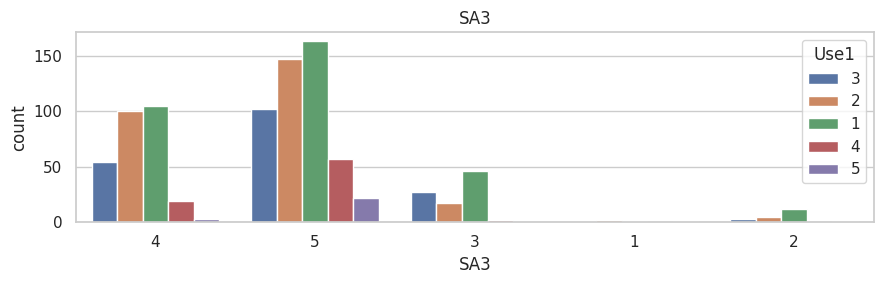

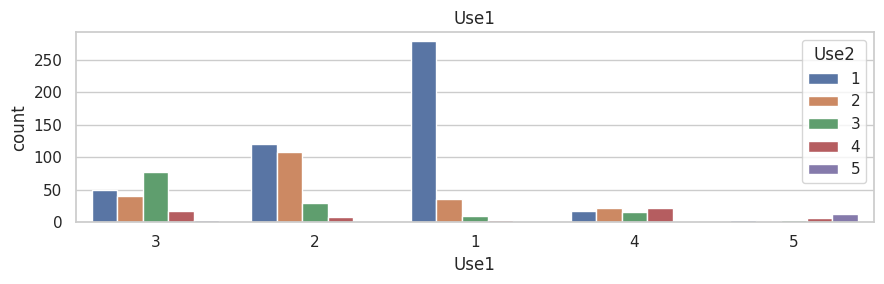

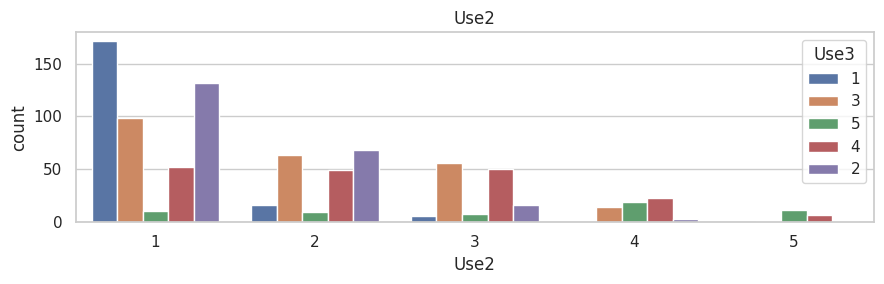

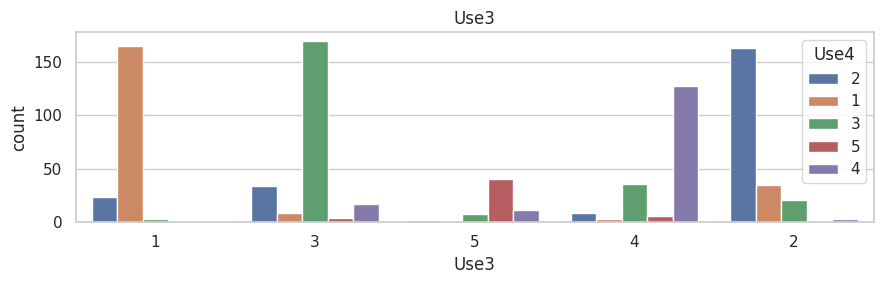

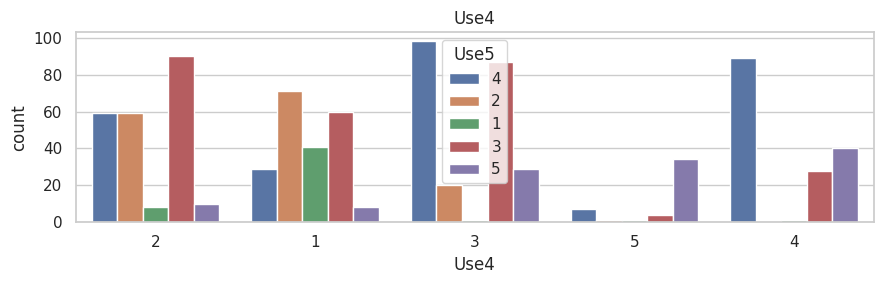

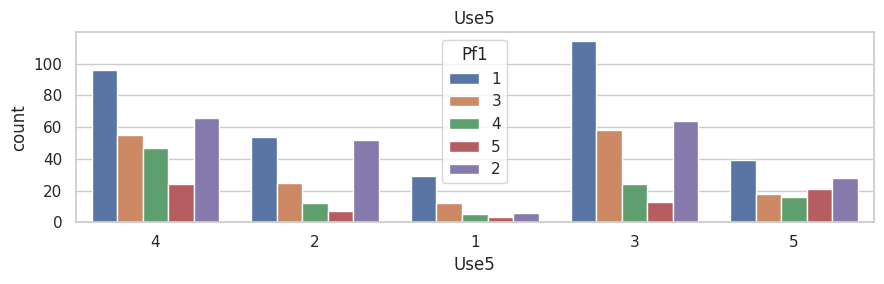

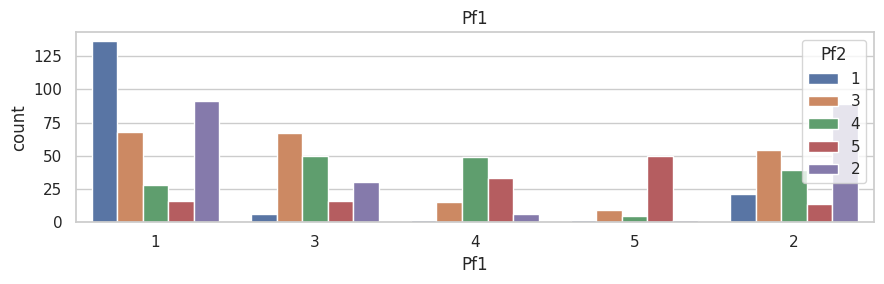

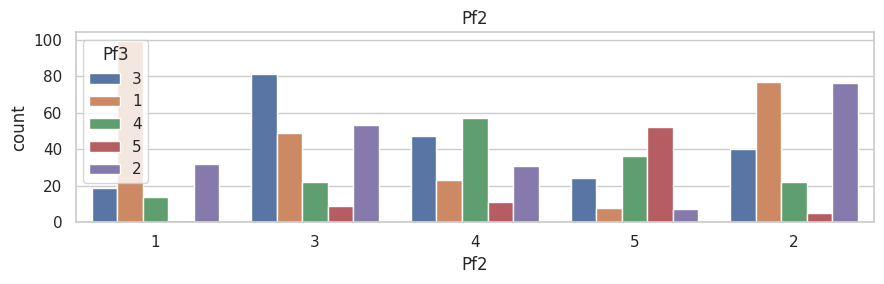

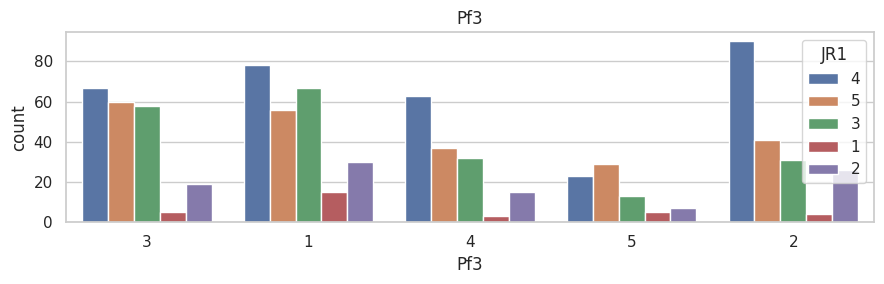

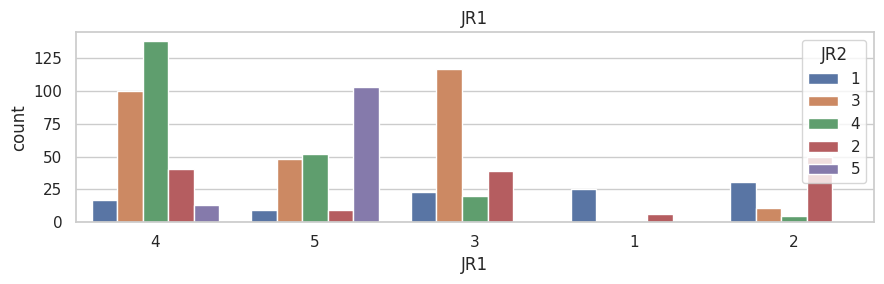

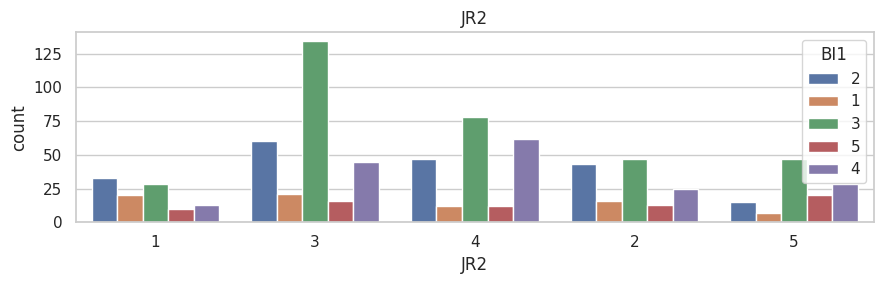

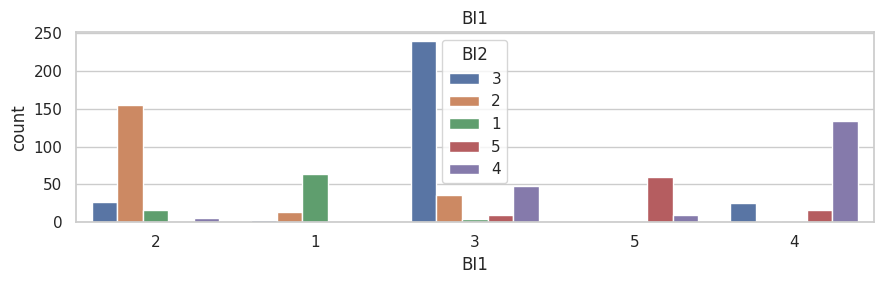

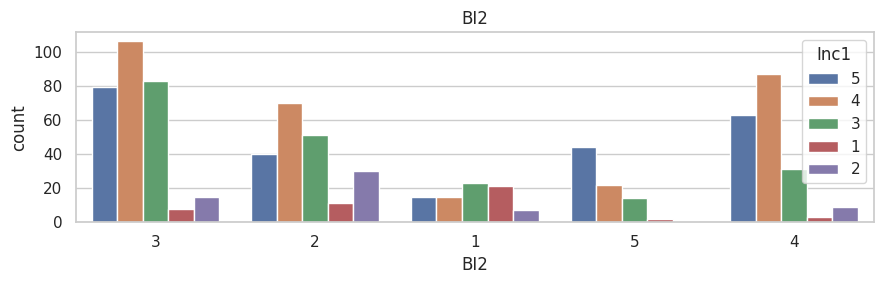

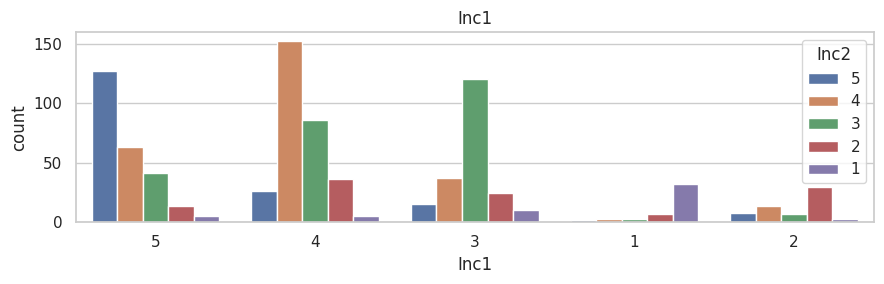

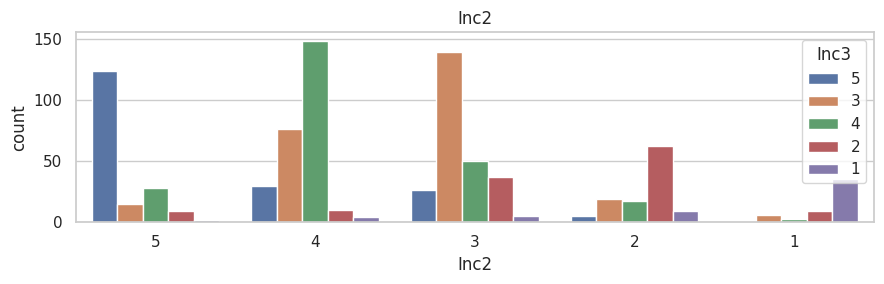

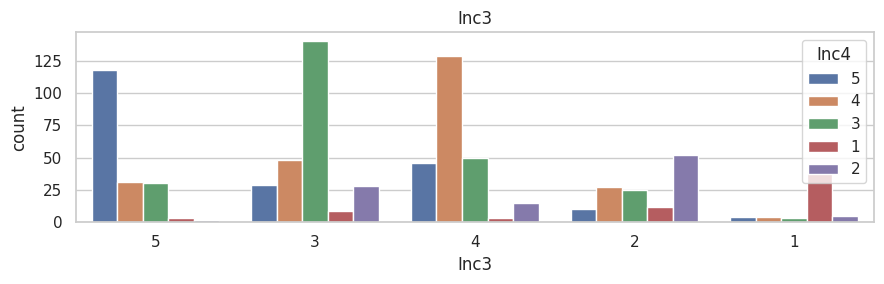

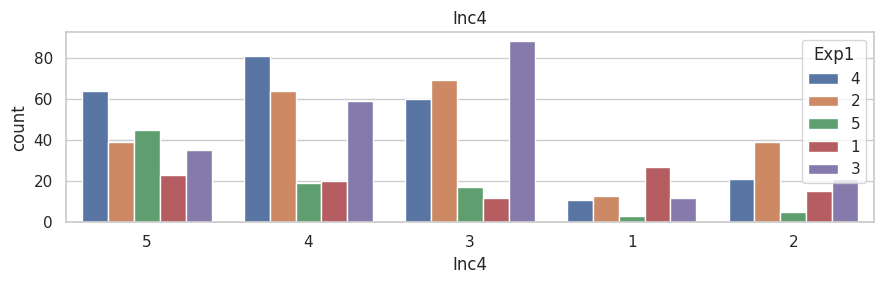

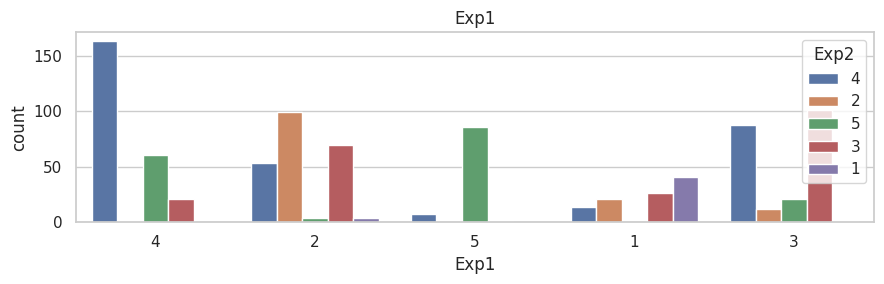

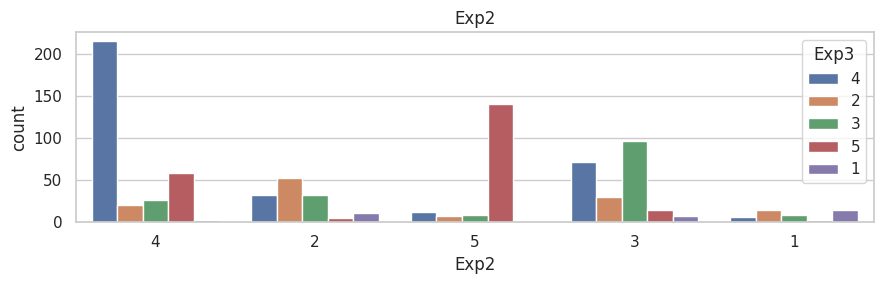

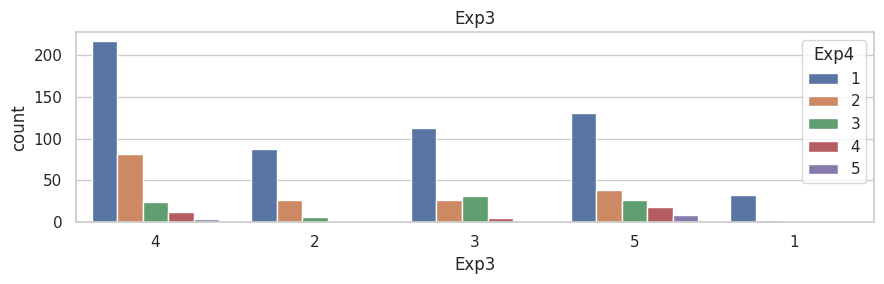

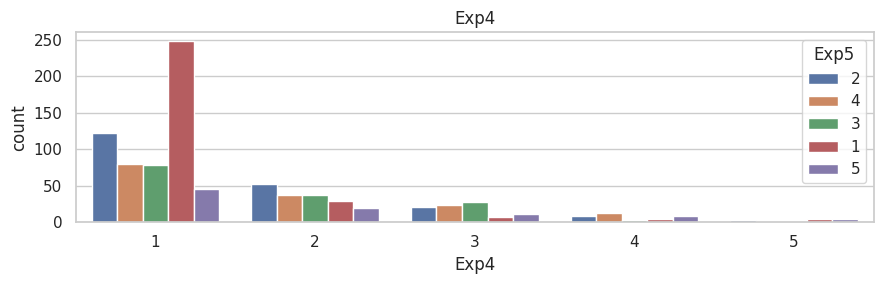

stop


In [295]:
for i in range(0, len(categorical)) :
  j =0
  j = i+1
  if j < len(categorical) :

   plt.figure(figsize=(9,3))
   sns.countplot(x=df[categorical[i]],hue= df[categorical[j]], data=df)
   plt.title(categorical[i])
   plt.tight_layout()
   plt.show()
  else :
      print('stop')

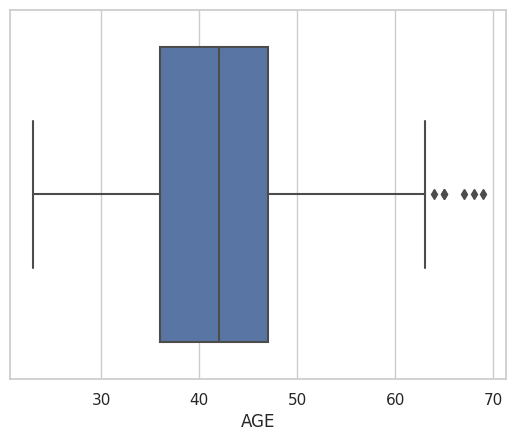

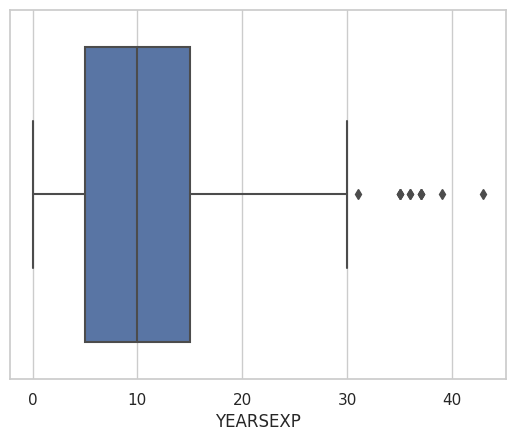

In [296]:
# Affichage des boxplot pour savoir s'il existe des valeurs abbérantes:
for i in df:
  if not(df[i].dtypes== 'object'):

    sns.set_theme(style="whitegrid")
    ax = sns.boxplot(x=df[i])
    plt.show()

In [297]:
# Calculate the mean of 'AGE' column
age_mean = df['AGE'].mean()

# Replace 'AGE' values greater than 60 with the mean value
df.loc[df['AGE'] > 60, 'AGE'] = age_mean

In [298]:
# Calculate the mean of 'AGE' column
years_median = df['YEARSEXP'].median()

# Replace 'AGE' values greater than 60 with the mean value
df.loc[df['YEARSEXP'] > 30, 'YEARSEXP'] = years_median

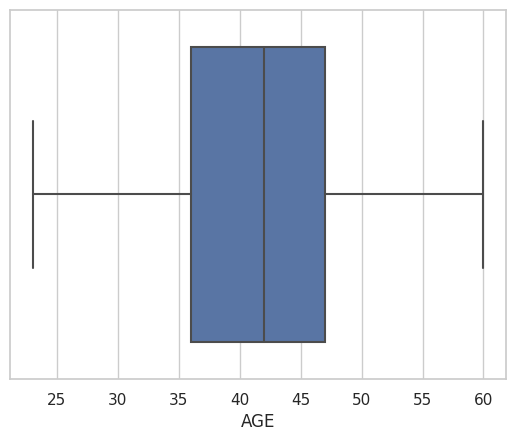

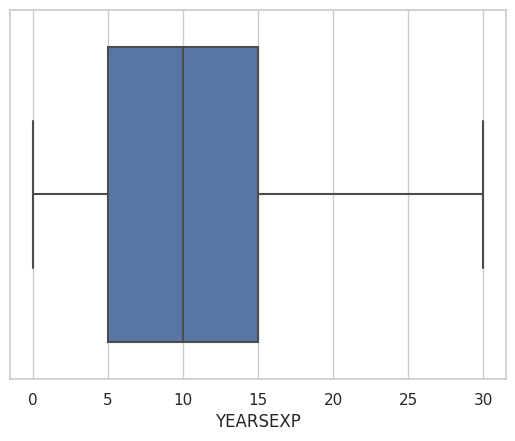

In [299]:
#Affichage des boxplot apres imputation:
for i in df:
  if not(df[i].dtypes== 'object'):

    sns.set_theme(style="whitegrid")
    ax = sns.boxplot(x=df[i])
    plt.show()

In [300]:
# Le rest des colonnes contenant des données manquantes sont seulement des colonnes catégorielles:
# on va remplacer ces données par le mode.
j=0
for i in df.columns:
  df[i]= df[i].fillna(df.mode().iloc[0,j])
  j+=1
df


,AGE,GENDER,DOMAIN,PhD,YEARSEXP,UNIVERSITY,UOC_POSITION,OTHERSTATUS,USERWIKI,PU1,...,BI2,Inc1,Inc2,Inc3,Inc4,Exp1,Exp2,Exp3,Exp4,Exp5
0,40.0,0,2,1,14.0,1,2,2,0,4,...,3,5,5,5,5,4,4,4,1,2
1,42.0,0,5,1,18.0,1,2,2,0,2,...,2,4,4,3,4,2,2,4,2,4
2,37.0,0,4,1,13.0,1,3,2,0,2,...,1,5,3,5,5,2,2,2,1,3
3,40.0,0,4,0,13.0,1,3,2,0,3,...,3,3,4,4,3,4,4,3,3,4
4,51.0,0,6,0,8.0,1,3,2,1,4,...,5,5,5,4,4,5,5,5,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,43.0,0,5,1,21.0,2,6,2,0,3,...,2,2,2,2,2,4,4,4,1,1
909,53.0,0,6,0,25.0,2,6,6,0,3,...,4,4,3,3,4,4,4,4,1,1
910,39.0,0,5,1,9.0,2,6,4,0,3,...,2,5,4,3,3,5,5,5,4,1
911,40.0,0,3,1,10.0,2,6,2,0,3,...,5,1,5,2,2,4,4,2,1,1


In [301]:
#Affichage de la somme des données de chaque classe de chaque colonne apres modification
for i in df.columns:
    print(df[i].value_counts())

43.00000    49
39.00000    44
46.00000    44
42.00000    44
45.00000    43
33.00000    43
38.00000    42
41.00000    41
40.00000    38
35.00000    38
44.00000    38
36.00000    35
48.00000    35
49.00000    32
47.00000    32
37.00000    31
34.00000    30
50.00000    28
31.00000    23
52.00000    22
32.00000    21
42.24644    19
51.00000    18
53.00000    16
29.00000    13
28.00000    11
56.00000    11
54.00000    11
55.00000    10
30.00000     9
58.00000     8
59.00000     7
60.00000     6
57.00000     5
26.00000     5
27.00000     4
24.00000     3
23.00000     2
25.00000     2
Name: AGE, dtype: int64
0    525
1    388
Name: GENDER, dtype: int64
6    363
1    183
4    137
5    101
3     73
2     56
Name: DOMAIN, dtype: int64
0    489
1    424
Name: PhD, dtype: int64
10.0    111
3.0      65
15.0     62
5.0      61
4.0      59
20.0     56
12.0     53
7.0      47
1.0      43
6.0      42
8.0      42
2.0      39
18.0     25
14.0     24
25.0     22
9.0      21
11.0     21
16.0     19
13.0   

In [303]:
df.isnull().sum()

AGE             0
GENDER          0
DOMAIN          0
PhD             0
YEARSEXP        0
UNIVERSITY      0
UOC_POSITION    0
OTHERSTATUS     0
USERWIKI        0
PU1             0
PU2             0
PU3             0
PEU1            0
PEU2            0
PEU3            0
ENJ1            0
ENJ2            0
Qu1             0
Qu2             0
Qu3             0
Qu4             0
Qu5             0
Vis1            0
Vis2            0
Vis3            0
Im1             0
Im2             0
Im3             0
SA1             0
SA2             0
SA3             0
Use1            0
Use2            0
Use3            0
Use4            0
Use5            0
Pf1             0
Pf2             0
Pf3             0
JR1             0
JR2             0
BI1             0
BI2             0
Inc1            0
Inc2            0
Inc3            0
Inc4            0
Exp1            0
Exp2            0
Exp3            0
Exp4            0
Exp5            0
dtype: int64